## 1. Imports

In [40]:
# --- Standard imports
import sys
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os

# --- Import GranFilmPy
sys.path.append('../granfilmpy/src/')
import GranFilmPy

# --- Customize matplotlib
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 12

## 2. Microscopic and macroscopic properties of a Ag / ZnO system.

In [41]:
# --- Initialize a new simulation
gf = GranFilmPy.GranFilm()

# --- Set the parameters of the system
gf.param["media"] = ['air', 'zno', 'ag', 'zno'] # Silver particles on a ZnO substrate.
gf.param["theta0"] = 0.0 # Normal incidence

# --- Run the simulation
gf()

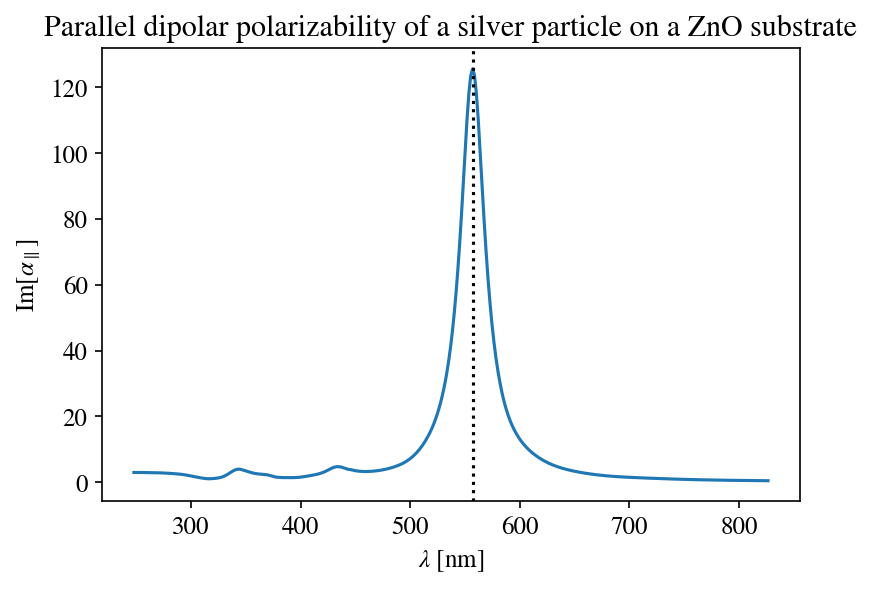

In [42]:
# --- Get the wavelength range and the polarizabilities
wavelength = gf.wavelength
alpha_par, alpha_perp = gf.Polarizabilities(fmt='Imag')

# --- Plot the parallel polarizability against the wavelength
plt.figure(dpi=150)
plt.plot(wavelength,alpha_par)
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel(r'Im[$\alpha_{\parallel}$]')
plt.title('Parallel dipolar polarizability of a silver particle on a ZnO substrate')
plt.axvline(x=557, color='k', linestyle=':')
plt.savefig('figures/GranFilm_Release/alpha_par.png', dpi=200, format='png', transparence=True)
plt.show()

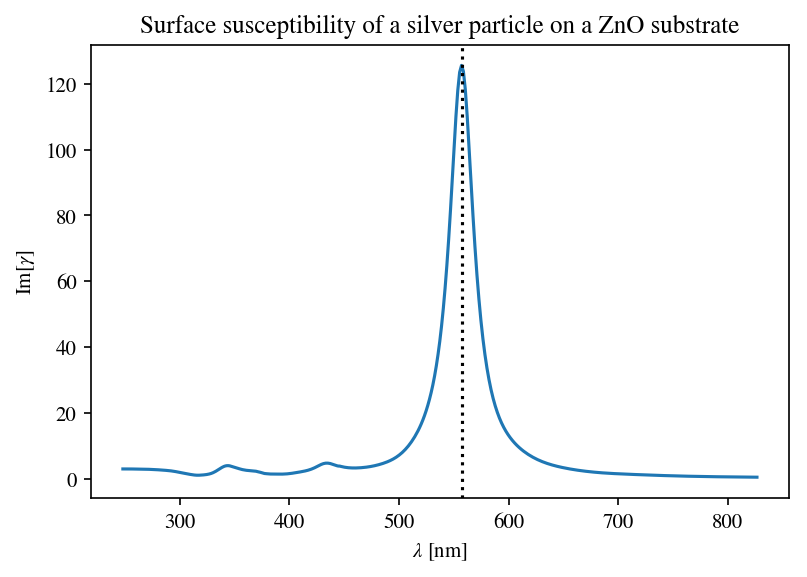

In [6]:
# --- Get the first order surface susceptibilities
gamma, beta  = gf.Susceptibilities(fmt='Imag')

# --- Plot the surface susceptibility against the wavelength.
plt.figure(dpi=150)
plt.plot(wavelength,gamma)
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel(r'Im[$\gamma$]')
plt.axvline(x=557, color='k', linestyle=':')
plt.title('Surface susceptibility of a silver particle on a ZnO substrate')
plt.savefig('figures/GranFilm_Release/gamma.png', dpi=200, format='png')
plt.show()

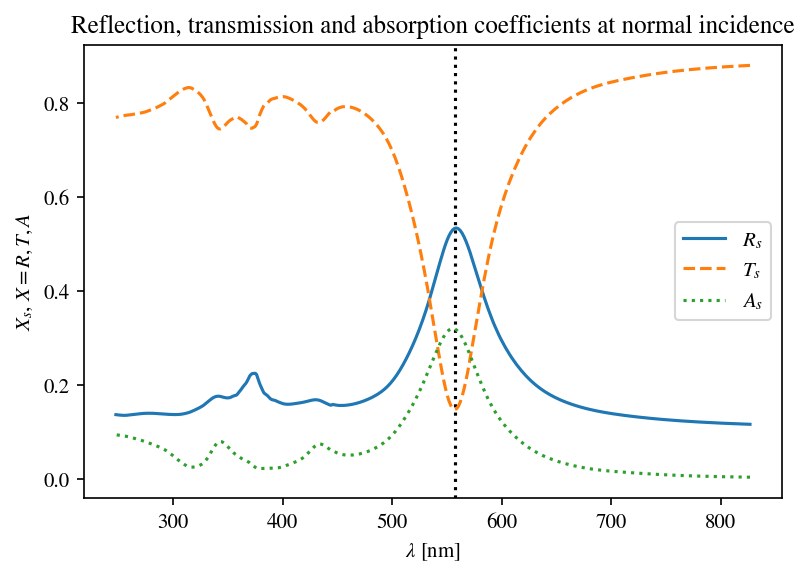

In [9]:
# --- Get the reflection, transmission and absorption coefficients
Rp,Rs,Rps = gf.Reflectivity(mode='R')
Tp,Ts,Tps = gf.Transmissivity(mode='T')
Ap,As,Aps = gf.Absorptivity(mode='A')

# --- Plot R, T and A as a function of the wavelength
plt.figure(dpi=150)
plt.axvline(x=557, color='k', linestyle=':')
plt.plot(wavelength,Rs,label='$R_s$')
plt.plot(wavelength,Ts, '--', label='$T_s$')
plt.plot(wavelength,As, ':', markevery=5, label='$A_s$')
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel(r'$X_s$, $X = R, T, A$')
plt.legend()
plt.title('Reflection, transmission and absorption coefficients at normal incidence')
plt.savefig('figures/GranFilm_Release/R_T_A.png', dpi=200, format='png')
plt.show()

In [10]:
# --- Set the parameters for the calculation of the electrostatic potential
gf = GranFilmPy.GranFilm()
gf.param["media"] = ['air', 'zno', 'ag', 'zno']
gf.param["theta0"] = 0.0
gf.param.Potential["mode"] = 'square'
gf.param.Potential["energy"] = 2.226
gf()

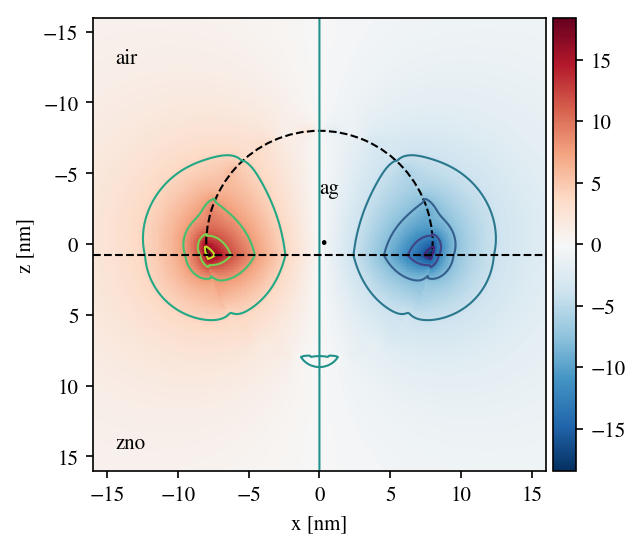

<Figure size 432x288 with 0 Axes>

In [11]:
plt.figure(dpi=150)
gf.Potential()
plt.savefig('figures/GranFilm_Release/potential', dpi=200, format='png')

## System 1

Silver hemispheres of radius = 4 nm coated with silver oxyde (ag2o, 2 nm shell), supported by a ZnO substrate.
<img src="./images/system1_release.png" alt="How to set the materials that composes the system" style="width: 450px;"/>
<br>

### Set the parameters

In [18]:
system1 = GranFilmPy.GranFilm() # Initialize a new system.

# --- Configure the system
system1.param["radius"] = 6                                  # radius of the whole particle = 4 + 2 = 6 nm
system1.param["lattice_constant"] = 15                       # distance between 2 particles, in nanometers
system1.param["truncation_ratio"] = 0                        # 0 for hemispheres
system1.param["media"] = ['air', 'zno', 'ag2o', 'zno', 'ag', 'zno'] # Materials used in the system
system1.param["radius_ratios"] = [1, 4/6]


# Check the configuration to print the parameters
system1.param()


&Global 
  granfilm_exe              = '/home/sunniva/Documents/phd/code/GranFilm/python/granfilmpy/bin/GranFilm' 
  epsilon_root              = '/home/sunniva/Documents/phd/code/GranFilm/python/granfilmpy/epsilon/' 
  eigenmode_map             = 'False' 
/

&Source 
  theta0                    = 45.0 
  phi0                      = 0.0 
  polarization              = 'p' 
  energy_range              = [1.5, 5] 
/

&Geometry 
  radius                    = 6 
  truncation_ratio          = 0 
  radius_ratios             = [1, 0.6666666666666666] 
  media                     = ['air', 'zno', 'ag2o', 'zno', 'ag', 'zno'] 
  broadening                = [0, 0] 
  distribution              = None 
/

&Interaction 
  arrangement               = 'Lattice' 
  lattice_type              = 'Square' 
  island_island_interaction = 'Dipole' 
  lattice_constant          =  15 
/

&Numerics 
  multipole_position_ratio  = 0.0 
  no_energy_points          = 512 
  multipole_order           = 16 
/




### Run the simulation and visualize the results

In [44]:
# --- Save the changes
system1 = GranFilmPy.GranFilm()

system1.param["radius"] = 6                                  # radius of the whole particle = 4 + 2 = 6 nm
system1.param["lattice_constant"] = 15                       # distance between 2 particles, in nanometers
system1.param["truncation_ratio"] = 0                        # 0 for hemispheres
system1.param["media"] = ['air', 'zno', 'ag2o', 'zno', 'ag', 'zno'] # Materials used in the system
system1.param["radius_ratios"] = [1, 4./6.]


system1.param()

# --- Run the simulation
system1() # Run the simulation.


# --- Get the reflectivity, transmissivity and absorption of the system

wavelength = system1.wavelength
Rp,Rs,Rps = system1.Reflectivity(mode='R')
Tp,Ts,Tps = system1.Transmissivity(mode='T')
Ap,As,Aps = system1.Absorptivity(mode='A')

# --- Plot the results

plt.figure(dpi=150)

plt.axvline(x=655, color='k', linestyle=':')

plt.plot(wavelength,Rs,label='$R_s$')
plt.plot(wavelength,Ts, '--', label='$T_s$')
plt.plot(wavelength,As, ':', label='$A_s$')

plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel(r'$X_s$, $X = R, T, A$')
plt.title('Reflection, transmission and absorption coefficients for system 1')
plt.legend()
plt.show()

&Global 
  granfilm_exe              = '/home/sunniva/Documents/phd/code/GranFilm/python/granfilmpy/bin/GranFilm' 
  epsilon_root              = '/home/sunniva/Documents/phd/code/GranFilm/python/granfilmpy/epsilon/' 
  eigenmode_map             = 'False' 
/

&Source 
  theta0                    = 45.0 
  phi0                      = 0.0 
  polarization              = 'p' 
  energy_range              = [1.5, 5] 
/

&Geometry 
  radius                    = 6 
  truncation_ratio          = 0 
  radius_ratios             = [1, 0.6666666666666666] 
  media                     = ['air', 'zno', 'ag2o', 'zno', 'ag', 'zno'] 
  broadening                = [0, 0] 
  distribution              = None 
/

&Interaction 
  arrangement               = 'Lattice' 
  lattice_type              = 'Square' 
  island_island_interaction = 'Dipole' 
  lattice_constant          =  15 
/

&Numerics 
  multipole_position_ratio  = 0.0 
  no_energy_points          = 512 
  multipole_order           = 16 
/


ERROR : 

UnboundLocalError: local variable 'data' referenced before assignment

## Non-coated system

Silver hemispheres of radius = 4 nm, supported by a ZnO substrate.
<img src="./images/system3_release.png" alt="How to set the materials that composes the system" style="width: 450px;"/>
<br>

### Influence of the angle of incidence

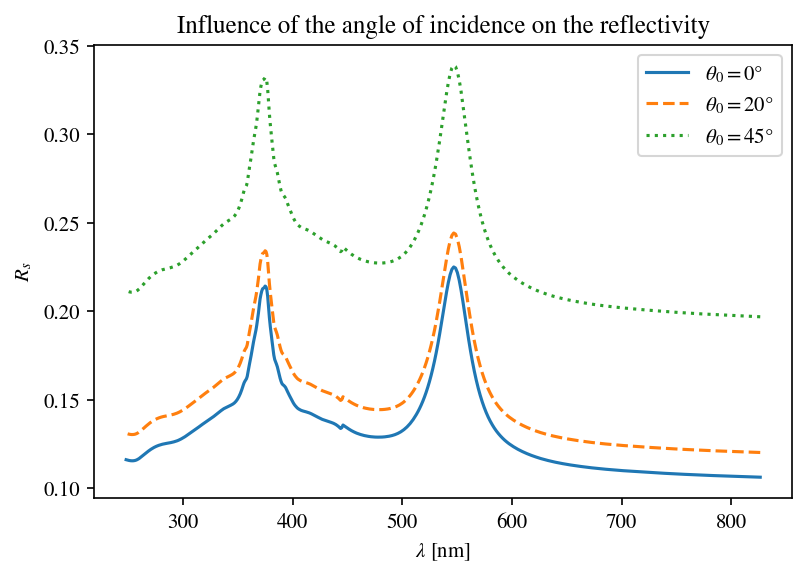

In [26]:
system2 = GranFilmPy.GranFilm() # Initialize a new system.

# --- Configure the system

system2.param["radius"] = 4 # radius of the whole particle = 4 nm

system2.param["lattice_constant"] = 15 # distance between 2 particles, in nanometers

system2.param["truncation_ratio"] = 0 # 0 for hemispheres

system2.param["media"] = ['air', 'zno', 'ag','zno'] # Materials used in the system


# --- Loop over several angles of incidence: 0°, 20° and 45°.

plt.figure(dpi=150)

theta = [0, 20, 45]
linestyles = ['-', '--', ':']

for k in range(3):
    
    system2.param["theta0"] = theta[k]
    
    system2()
    
    wavelength = system2.wavelength
    Rp,Rs,Rps = system2.Reflectivity(mode='R')
    
    plt.plot(wavelength, Rs, linestyles[k], label=r'$\theta_0 = {}°$'.format(theta[k]))

plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel(r'$R_s$')

plt.legend()
plt.title('Influence of the angle of incidence on the reflectivity')
plt.savefig('figures/GranFilm_Release/R_theta.png', dpi=200, format='png')
plt.show()

### Influence of the multipole order

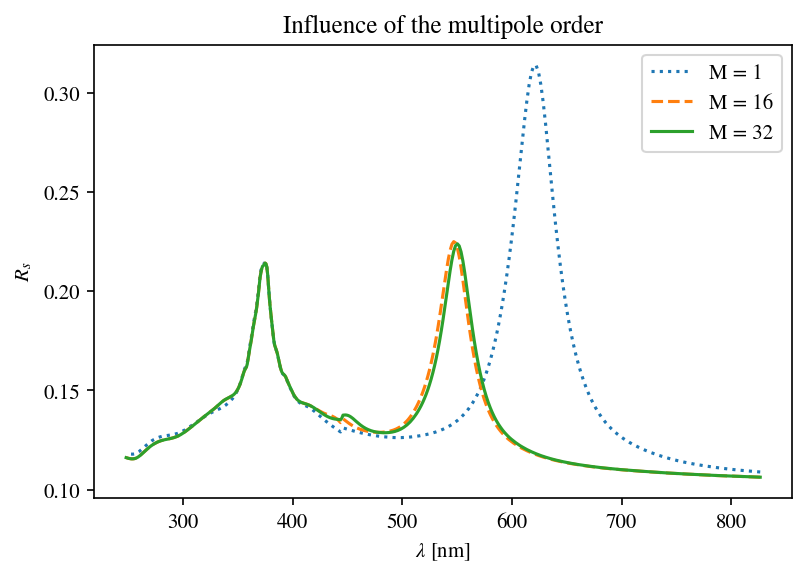

In [27]:
system2 = GranFilmPy.GranFilm() # Initialize a new system.

# --- Configure the system

system2.param["radius"] = 4 # radius of the whole particle = 4 nm

system2.param["lattice_constant"] = 15 # distance between 2 particles, in nanometers

system2.param["truncation_ratio"] = 0 # 0 for hemispheres

system2.param["media"] = ['air', 'zno', 'ag','zno'] # Materials used in the system

system2.param["theta0"] = 0 # Normal incidence


# --- Loop over several multipole orders M: 1 (dipole), 16 and 30

plt.figure(dpi=150)
M = [1, 16, 32]
linestyles = [':', '--', '-']

for k in range(3):
    
    system2.param["multipole_order"] = M[k]
    
    system2()
    
    wavelength = system2.wavelength
    Rp,Rs,Rps = system2.Reflectivity(mode='R')
    
    plt.plot(wavelength, Rs, linestyles[k], label='M = {}'.format(M[k]))
    plt.xlabel(r'$\lambda$ [nm]')
    plt.ylabel(r'$R_s$')

plt.legend()
plt.title('Influence of the multipole order')
plt.savefig('figures/GranFilm_Release/R_multipole.png', dpi=200, format='png')
plt.show()

### Particle - particle interactions

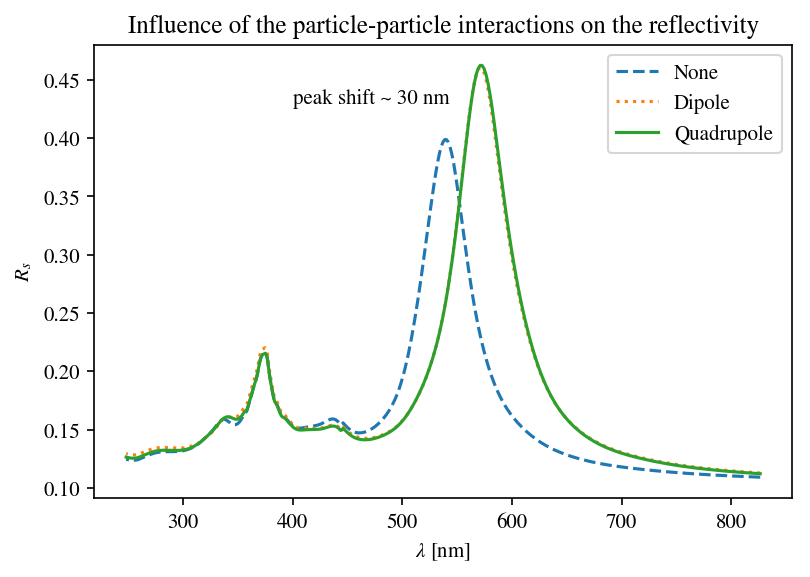

In [28]:
system2 = GranFilmPy.GranFilm() # Initialize a new system.

# --- Configure the system

system2.param["radius"] = 6 # radius of the whole particle = 4 nm

system2.param["lattice_constant"] = 15 # distance between 2 particles, in nanometers

system2.param["truncation_ratio"] = 0 # 0 for hemispheres

system2.param["media"] = ['air', 'zno', 'ag','zno'] # Materials used in the system

system2.param["theta0"] = 0 # Normal incidence

# --- Loop over several type of particle-particle interactions: none, dipolar and quadrupolar interactions

plt.figure(dpi=150)

linestyles = ['--', ':', '-']
interaction = ['None', 'Dipole', 'Quadrupole']

for k in range(3):
    
    system2.param["island_island_interaction"] = interaction[k]
    
    system2()
    
    wavelength = system2.wavelength
    Rp,Rs,Rps = system2.Reflectivity(mode='R')
    
    plt.plot(wavelength, Rs, linestyles[k], label='{}'.format(interaction[k]))

plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel(r'$R_s$')
plt.legend()
plt.annotate(s='peak shift ~ 30 nm', xy=(400,0.43), xytext=(400,0.43))
plt.title('Influence of the particle-particle interactions on the reflectivity')
plt.savefig('figures/GranFilm_Release/R_interaction.png', dpi=200, format='png')
plt.show()

### Epsilon corrections

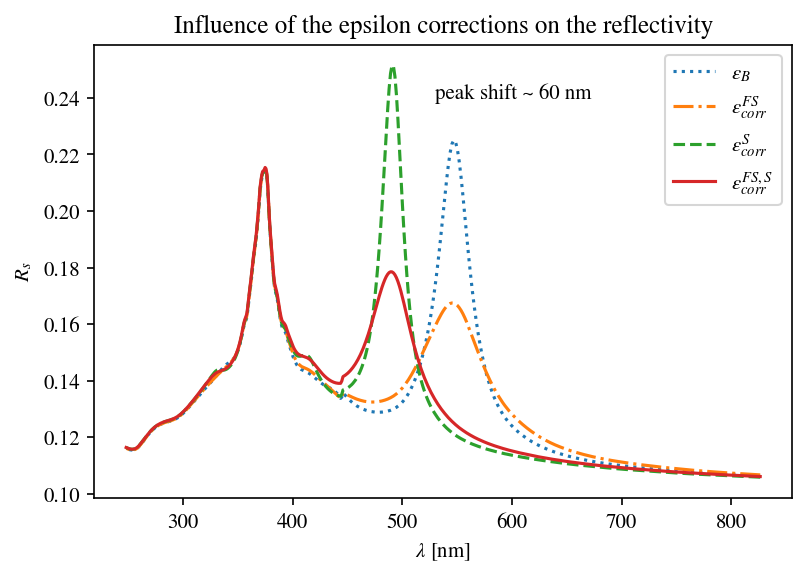

In [30]:
system2 = GranFilmPy.GranFilm() # Initialize a new system.

# --- Configure the system

system2.param["radius"] = 4 # radius of the whole particle = 4 nm

system2.param["lattice_constant"] = 15 # distance between 2 particles, in nanometers

system2.param["truncation_ratio"] = 0 # 0 for hemispheres

system2.param["media"] = ['air', 'zno', 'ag','zno'] # Materials used in the system

system2.param["theta0"] = 0 # Normal incidence

# --- Loop over several type of epsilon corrections: none, finite-size and quantum blue shift

plt.figure(dpi=150)
#plt.title('Influence of different corrections on the dielectric function of silver')
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel(r'$R_s$')

# --- No correction, normal incidence

system2()

wavelength = system2.wavelength
Rp,Rs,Rps = system2.Reflectivity(mode='R')
plt.plot(wavelength,Rs, ':', label=r'$\epsilon_B$')

# --- Finite-size correction

eps_corr_silver = {}
eps_corr_silver['Material'] = 'ag'
eps_corr_silver['Correction'] = 'Finite-Size'
eps_corr_silver['Plasma_Frequency'] = 9.17
eps_corr_silver['Damping_Frequency'] = 0.018
eps_corr_silver['Fermi_Velocity'] = 0.91
eps_corr_silver['Finite_Size_Constant'] = 0.6

system2.param.extra_parameters["ag"] = eps_corr_silver

system2()

wavelength = system2.wavelength
Rp,Rs,Rps = system2.Reflectivity(mode='R')
plt.plot(wavelength,Rs, '-.', label=r'$\epsilon_{corr}^{FS}$')

# --- Surface correction

eps_corr_silver['Plasmon_Shift'] = -1.13
eps_corr_silver['Correction'] = 'Surface'

system2.param.extra_parameters["ag"] = eps_corr_silver

system2()

Rp,Rs,Rps = system2.Reflectivity(mode='R')
plt.plot(wavelength,Rs, '--', label=r'$\epsilon_{corr}^{S}$')

# --- Finite-size + Surface correction

system2.param.extra_parameters['ag']['Correction'] = ['Finite-Size','Surface']

system2()

Rp,Rs,Rps = system2.Reflectivity(mode='R')
plt.plot(wavelength,Rs,'-',label=r'$\epsilon_{corr}^{FS,S}$')

plt.legend()
plt.annotate(s='peak shift ~ 60 nm', xy=(530,0.24), xytext=(530,0.24))
plt.title('Influence of the epsilon corrections on the reflectivity')
plt.savefig('figures/GranFilm_Release/R_epsilon.png', dpi=200, format='png')
plt.show()

# --- No correction again
system2.param.extra_parameters = {}
system2()

### Comparison with effective medium theory

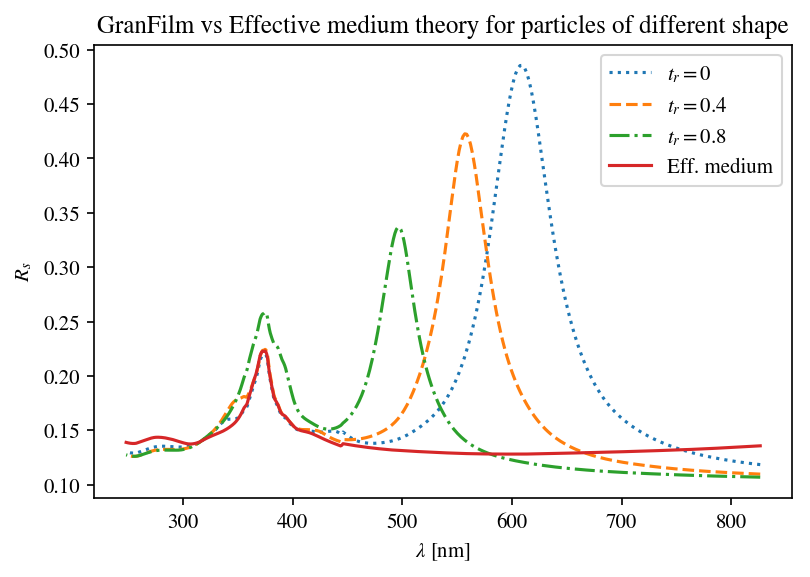

In [31]:
system2 = GranFilmPy.GranFilm() # Initialize a new system.

# --- Configure the system

system2.param["radius"] = 4 # radius of the whole particle = 4 nm

system2.param["lattice_constant"] = 15 # distance between 2 particles, in nanometers

system2.param["truncation_ratio"] = 0 # 0 for hemispheres

system2.param["media"] = ['air', 'zno', 'ag','zno'] # Materials used in the system

system2.param["theta0"] = 0 # Normal incidence

# --- Plot the results

R0 = system2.param['radius']

plt.figure(dpi=150)
tr = [0, 0.4, 0.8]
linestyles = [':', '--','-.']

for k in range(3):

    system2.param["truncation_ratio"] = tr[k]
    Vf = 0.5
    h = R0
    system2.param["radius"] = R = h/(1+tr[k])
    system2.param["lattice_constant"] = lc = np.sqrt(np.pi*R**3*(3*tr[k]-tr[k]**3+2)/(3*h*Vf))
    #print(system2.volume_above()/(lc**2*h))
    system2()
    wavelength = system2.wavelength
    Rp,Rs,Rps = system2.Reflectivity(mode='R')
    plt.plot(wavelength, Rs, linestyles[k], label=r'$t_r = {}$'.format(tr[k]))

for tr in [0]:

    system2.param["truncation_ratio"] = tr
    Vf = 0.5
    h = R0
    system2.param["radius"] = R = h/(1+tr)
    system2.param["lattice_constant"] = lc = np.sqrt(np.pi*R**3*(3*tr-tr**3+2)/(3*h*Vf))
    #print(system2.volume_above()/(lc**2*h))
    Rp,Rs = system2.Reflectivity_effective_medium(thickness=h)
    plt.plot(wavelength, Rs, '-', label='Eff. medium')
    
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel(r'$R_s$')
plt.legend()
plt.title('GranFilm vs Effective medium theory for particles of different shape')
plt.savefig('figures/GranFilm_Release/R_effective_medium.png', dpi=200, format='png')
plt.show()

In [33]:
# --- Initialize a new simulation
gf = GranFilmPy.GranFilm()

# --- Set the parameters of the system that we know about
gf.param["media"] = ['air','al2o3p','ag','al2o3p'] # Silver particles on an alumina substrate
gf.param["lattice_type"] = 'Hexagonal'
gf.param["island_island_interaction"] = 'Dipole'
gf.param["energy_range"] = [2.0,4.5] # Must match the energy range on which the experimental data have been acquired

# --- Set corrections for the dielectric function of silver (essential for the fitting quality)
eps_corr_silver = {'Material':'ag', 'Correction':['Finite-Size','Surface'],'Plasma_Frequency':9.17,
                   'Damping_Frequency':0.018,'Fermi_Velocity':0.91,'Finite_Size_Constant':0.6,
                   'Plasmon_Shift':-1.13}

gf.param.extra_parameters['ag'] = eps_corr_silver

# --- Initialize some fitted parameters with their guess values
gf.param["radius"] = 2.3

# --- Set the unknown parameters in gf.param.Fitting
fitting_params = {}
cwd = os.getcwd()
fitting_params['experimental_data'] = os.path.join(cwd,'../granfilmpy/doc/data/experimental_data.dat')
fitting_params["mode"] = 'dR/R' # Fit differential reflectivity spectra
fitting_params["radius"] = 2.3  # Guess value for the radius, default limits 
fitting_params["truncation_ratio"] = 0.67, 0.00001, 0.99 # Guess, Min, Max values of the truncation ratio
fitting_params["lattice_constant"] = 6.76, 5.0, 10 # Guess, Min, Max values of the lattice constant
fitting_params["broadening(1)"] = 0.15 # Guess value for the parallel broadening
fitting_params["broadening(2)"] = 0.075 # Guess value for the perpendicular broadening

gf.param.Fitting = fitting_params

# Perform the fitting
gf()

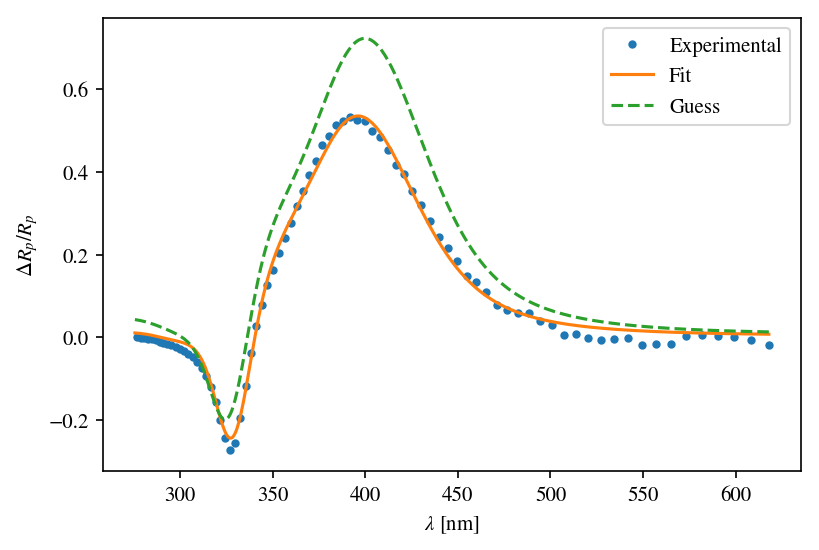

In [34]:
# Get the results of the fitting
x_fit = gf.Fitting.x_fit
lambda_fit = 1.24/x_fit * 1000 # wavelength in nm
wavelength = gf.wavelength
y_exp = gf.Fitting.y_exp
y_guess = gf.Fitting.y_guess
y_fit = gf.Fitting.y_fit

plt.figure(dpi=150)
plt.plot(lambda_fit,y_exp,'.',markevery=5,label='Experimental')
plt.plot(wavelength,y_fit,label='Fit')
plt.plot(wavelength,y_guess,linestyle='--',label='Guess')
#plt.title('Experimental data vs Simulation from guessed and fitted parameters')
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel(r'${\Delta R_p}/{R_p}$')
plt.legend()
#plt.title('Experimental reflectivity spectrum fitted with GranFilm')
plt.savefig('figures/GranFilm_Release/R_fit_lambda.png', dpi=200, format='png')
plt.show()

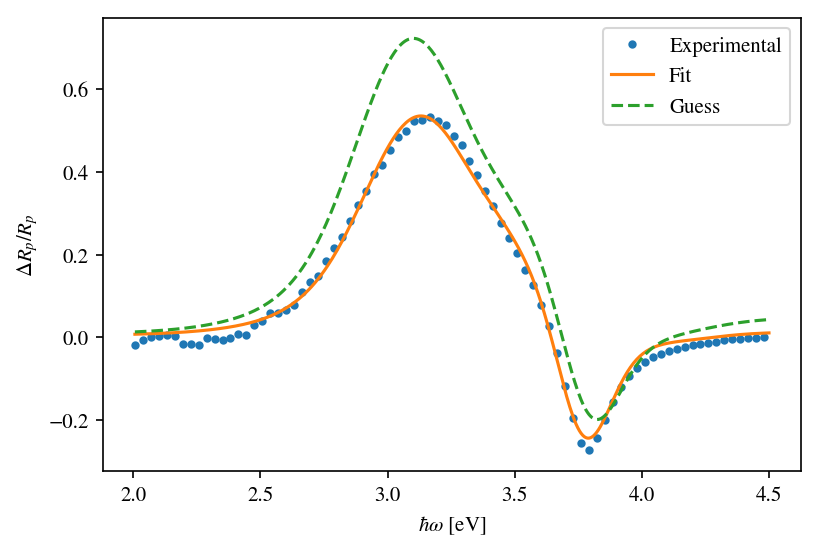

In [36]:
# Get the results of the fitting on the energy scale
x_fit = gf.Fitting.x_fit
energy = gf.energy
y_exp = gf.Fitting.y_exp
y_guess = gf.Fitting.y_guess
y_fit = gf.Fitting.y_fit

plt.figure(dpi=150)
plt.plot(x_fit,y_exp,'.',markevery=5,label='Experimental')
plt.plot(energy,y_fit,label='Fit')
plt.plot(energy,y_guess,linestyle='--',label='Guess')
#plt.title('Experimental data vs Simulation from guessed and fitted parameters')
plt.xlabel(r'$\hbar\omega$ [eV]')
plt.ylabel(r'${\Delta R_p}/{R_p}$')
plt.legend()
#plt.title('Experimental reflectivity spectrum fitted with GranFilm')
plt.savefig('figures/GranFilm_Release/R_fit_energy.png', dpi=200, format='png')
plt.show()

In [22]:
#%matplotlib notebook
#gf.Fitting()

### Why epsilon correction matters

In [23]:
# ---Initialize a new simulation
gf = GranFilmPy.GranFilm()

# --- Set the parameters of the system that we know about
gf.param["media"] = ['air','al2o3p','ag','al2o3p'] # Silver particles on an alumina substrate
gf.param["lattice_type"] = 'Hexagonal'
gf.param["island_island_interaction"] = 'Dipole'
gf.param["energy_range"] = [2.0,4.5] # Must match the energy range on which the experimental data have been acquired

# --- Set corrections for the dielectric function of silver (essential for the fitting quality)
eps_corr_silver = {'Material':'ag', 'Correction':['Finite-Size','Surface'],'Plasma_Frequency':9.17,
                   'Damping_Frequency':0.018,'Fermi_Velocity':0.91,'Finite_Size_Constant':0.6,
                   'Plasmon_Shift':-1.13}

gf.param.extra_parameters['ag'] = eps_corr_silver

# --- Initialize some fitted parameters with their guess values
gf.param["radius"] = 2.3

# --- Set the unknown parameters in gf.param.Fitting
fitting_params = {}
cwd = os.getcwd()
fitting_params['experimental_data'] = os.path.join(cwd,'../granfilmpy/doc/data/experimental_data.dat')
fitting_params["mode"] = 'dR/R' # Fit differential reflectivity spectra
fitting_params["radius"] = 2.3  # Guess value for the radius, default limits 
fitting_params["truncation_ratio"] = 0.67, 0.00001, 0.99 # Guess, Min, Max values of the truncation ratio
fitting_params["lattice_constant"] = 6.76, 5.0, 10 # Guess, Min, Max values of the lattice constant
fitting_params["broadening(1)"] = 0.15 # Guess value for the parallel broadening
fitting_params["broadening(2)"] = 0.075 # Guess value for the perpendicular broadening

gf.param.Fitting = fitting_params
# gf.param.Fitting = {} # Disable the curve fitting

# Perform the fitting
gf()

# --- Get the fitted curve
x_fit = gf.Fitting.x_fit
lambda_fit = 1.24/x_fit * 1000 # wavelength in nm
wavelength = gf.wavelength
y_exp = gf.Fitting.y_exp
y_guess = gf.Fitting.y_guess
y_fit = gf.Fitting.y_fit

In [24]:
# --- Initialize a new simulation
gf = GranFilmPy.GranFilm()

# --- Set the parameters of the system that we know about
gf.param["media"] = ['air','al2o3p','ag','al2o3p'] # Silver particles on an alumina substrate
gf.param["lattice_type"] = 'Hexagonal'
gf.param["island_island_interaction"] = 'Dipole'
gf.param["energy_range"] = [2.0,4.5] # Must match the energy range on which the experimental data have been acquired

# --- Initialize some fitted parameters with their guess values
gf.param["radius"] = 2.3

# --- Set the unknown parameters in gf.param.Fitting
fitting_params = {}
cwd = os.getcwd()
fitting_params['experimental_data'] = os.path.join(cwd,'../granfilmpy/doc/data/experimental_data.dat')
fitting_params["mode"] = 'dR/R' # Fit differential reflectivity spectra
fitting_params["radius"] = 2.3  # Guess value for the radius, default limits 
fitting_params["truncation_ratio"] = 0.67, 0.00001, 0.99 # Guess, Min, Max values of the truncation ratio
fitting_params["lattice_constant"] = 6.76, 5.0, 10 # Guess, Min, Max values of the lattice constant
fitting_params["broadening(1)"] = 0.15 # Guess value for the parallel broadening
fitting_params["broadening(2)"] = 0.075 # Guess value for the perpendicular broadening

gf.param.Fitting = fitting_params
# gf.param.Fitting = {} # Disable the curve fitting

# --- Perform the fitting
gf()

# --- Get the fitted curve
x_fit2 = gf.Fitting.x_fit
lambda_fit2 = 1.24/x_fit * 1000 # wavelength in nm
wavelength2 = gf.wavelength
y_exp2 = gf.Fitting.y_exp
y_guess2 = gf.Fitting.y_guess
y_fit2 = gf.Fitting.y_fit

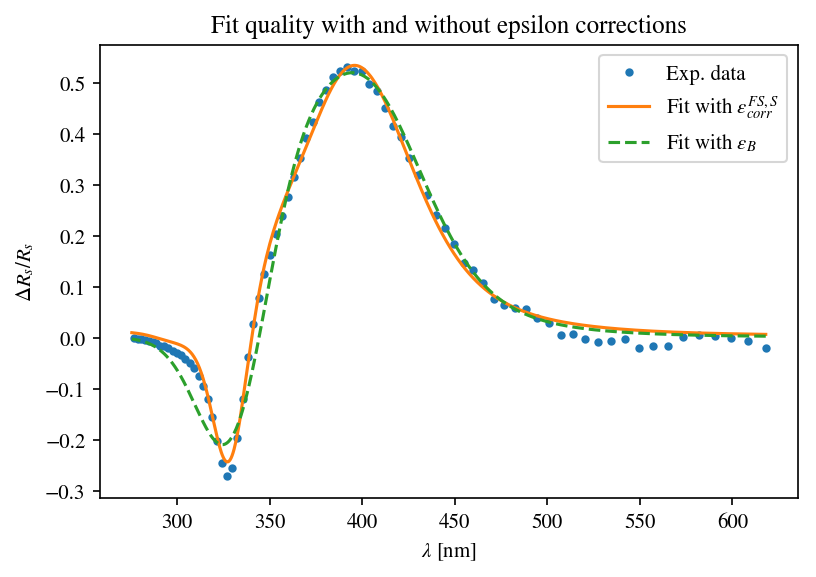

In [25]:
# --- Plot the results
plt.figure(dpi=150)
plt.plot(lambda_fit,y_exp,'.',markevery=5,label='Exp. data')
plt.plot(wavelength, y_fit, label=r'Fit with $\epsilon_{corr}^{FS,S}$')
plt.plot(wavelength2,y_fit2, '--', label=r'Fit with $\epsilon_B$')
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel(r'${\Delta R_s}/{R_s}$')
plt.legend()
plt.title('Fit quality with and without epsilon corrections')
plt.savefig('figures/GranFilm_Release/R_why_epsilon_correction.png', dpi=200, format='png')
plt.show()